In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import StrMethodFormatter

In [2]:
# Load dataset
dataset_raw = pd.read_csv("../dataset/train.csv")

In [3]:
dataset_raw.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [4]:
# Change data types of columns
dataset_raw['pickup_datetime']= pd.to_datetime(dataset_raw['pickup_datetime']) 
dataset_raw['dropoff_datetime']= pd.to_datetime(dataset_raw['dropoff_datetime']) 
dataset_raw = dataset_raw.astype({'vendor_id': 'object'})

In [5]:
dataset_raw.dtypes

id                            object
vendor_id                     object
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

## Data Exploration - Univariate

In [6]:
# Describing all the Numerical Features
dataset_raw.describe()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [7]:
# Describing all the Categorical Features
dataset_raw.describe(include=['O'])

,id,vendor_id,store_and_fwd_flag
count,1458644,1458644,1458644
unique,1458644,2,2
top,id1840610,2,N
freq,1,780302,1450599


In [8]:
dataset_raw.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Feature vendor_id

In [9]:
insights = pd.DataFrame()
insights["Frequency"] = dataset_raw["vendor_id"].value_counts()
insights["Normalized Frequency"] = dataset_raw["vendor_id"].value_counts(normalize=True) * 100
insights

,Frequency,Normalized Frequency
2,780302,53.495027
1,678342,46.504973


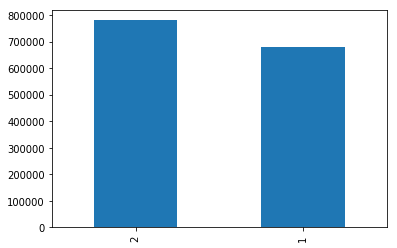

In [10]:
dataset_raw["vendor_id"].value_counts().plot(kind='bar')

### Feature pickup_datetime

In [11]:
insights = pd.DataFrame(columns=["pickup_datetime","week no"])
insights["pickup_datetime"] = dataset_raw['pickup_datetime']
insights["year"] = insights.pickup_datetime.dt.year
insights["month"] = insights.pickup_datetime.dt.month
insights["day"] = insights.pickup_datetime.dt.day
insights["hour"] = insights.pickup_datetime.dt.hour
insights["minute"] = insights.pickup_datetime.dt.minute
insights["weekday"] = insights.pickup_datetime.dt.weekday

In [12]:
# Add the week no
for i in range(7):
    for j in range(6):
        p = insights[(insights['month']==j+1) & (insights['weekday']==i)]
        d = p['day'].unique()
        d.sort()
        insights["week no"][p.index] = insights.loc[p.index]["day"].apply(list(d).index)

c:\users\pickme1124\pycharmprojects\testing\venv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [13]:
insights.head()

,pickup_datetime,week no,year,month,day,hour,minute,weekday
0,2016-03-14 17:24:55,1,2016,3,14,17,24,0
1,2016-06-12 00:43:35,1,2016,6,12,0,43,6
2,2016-01-19 11:35:24,2,2016,1,19,11,35,1
3,2016-04-06 19:32:31,0,2016,4,6,19,32,2
4,2016-03-26 13:30:55,3,2016,3,26,13,30,5


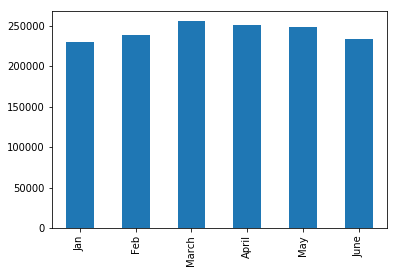

In [14]:
# Monthly trip count
months = ['Jan', 'Feb', 'March', 'April', 'May', 'June']
mapping = {i+1:month for i, month in enumerate(months)}
key = insights['month'].map(mapping)
key.iloc[key.argsort()].value_counts()[months].plot(kind='bar')

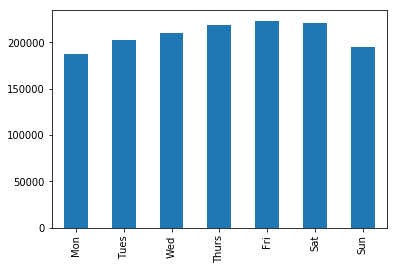

In [15]:
# Day wise trip count
days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat','Sun']
mapping = {i:day for i, day in enumerate(days)}
key = insights['weekday'].map(mapping)
key.iloc[key.argsort()].value_counts()[days].plot(kind='bar')

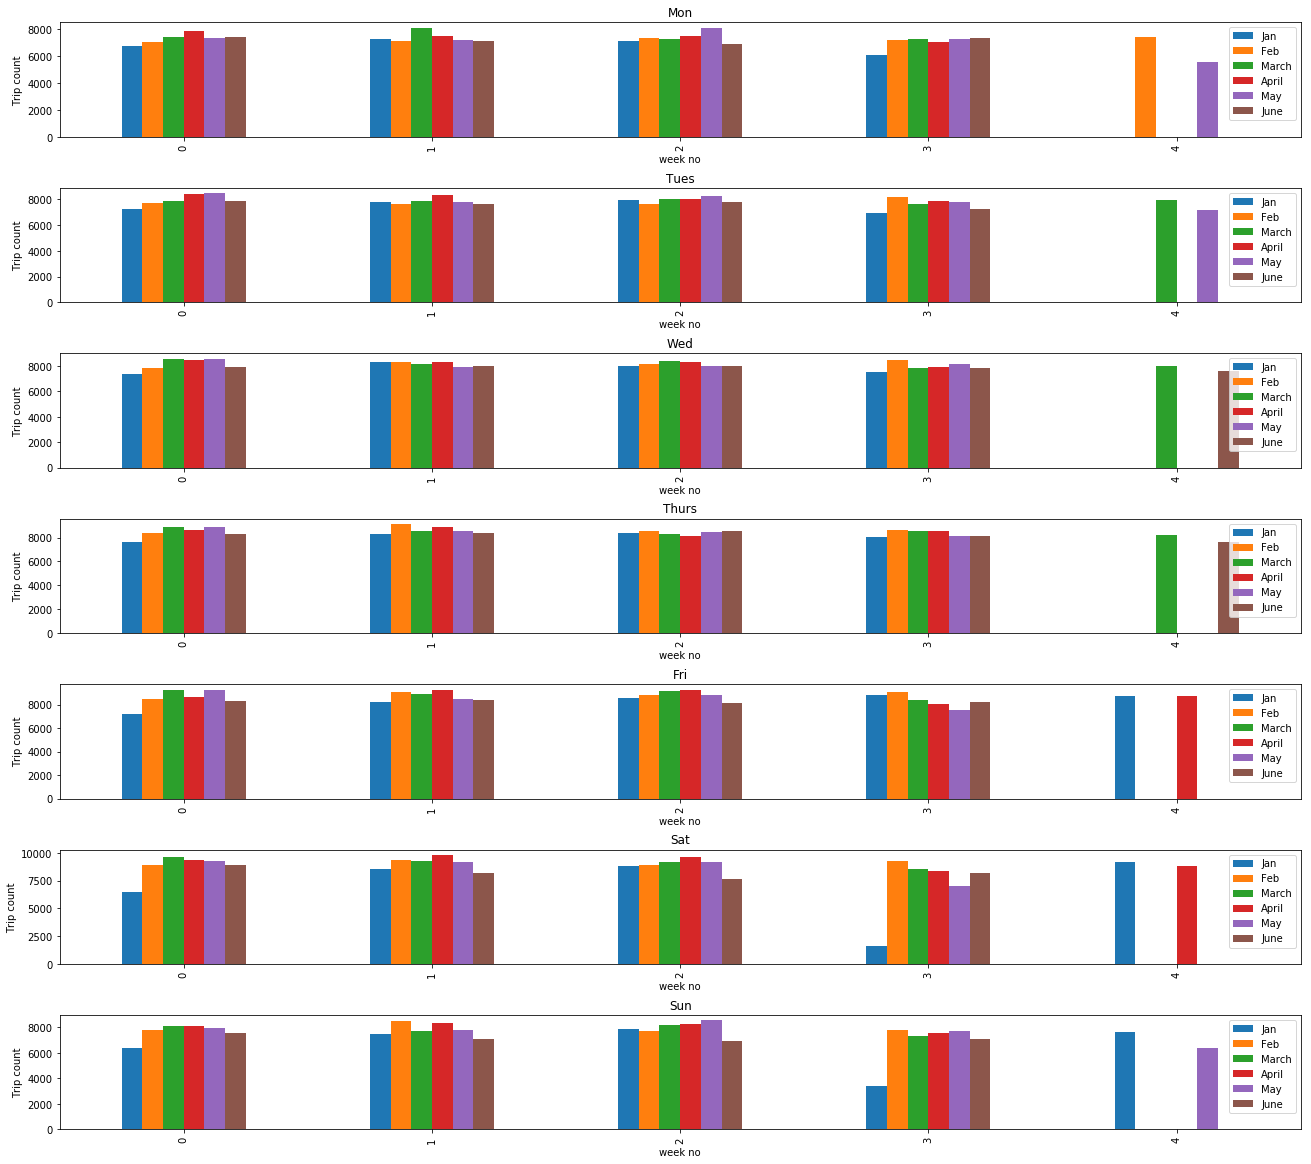

In [17]:
fig, ax = plt.subplots(7, 1)
fig.set_size_inches(18.5, 16.5)
fig.tight_layout(pad=3.0)
for i in range(7):
    a = insights[insights['weekday']==i].groupby("week no")['month'].value_counts().unstack(level=1).fillna(0).rename_axis([None], axis=1).reset_index().plot(x="week no", y=[1,2,3,4,5,6], kind="bar",ax=ax[i])
    a.set_title(days[i],loc='center')
    a.set_ylabel("Trip count")
    a.legend(months);

In [18]:
# Month wise trip count for each day
# fig = plt.figure(figsize=(12, 18))
# outer = gridspec.GridSpec(7, 1, wspace=0.3, hspace=0.6)

# for i in range(7):
#     inner = gridspec.GridSpecFromSubplotSpec(1, 6,subplot_spec=outer[i], wspace=0.5, hspace=0.1)
#     for j in range(6):
#         ax = plt.Subplot(fig, inner[j])
#         a = insights[(insights['month']==j+1) & (insights['weekday']==i)]["day"].value_counts().sort_index().plot(kind='bar',ax=ax)
#         a.set_xlabel(months[j])
#         if(j==3):
#             ax.set_title(days[i],loc='left')
            
#         fig.add_subplot(ax)
# fig.show()

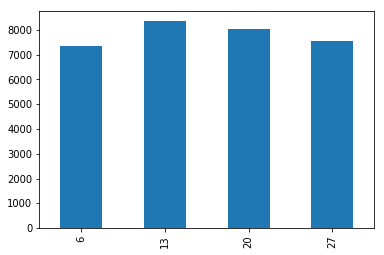

In [19]:
insights[(insights['month']==1) & (insights['weekday']==2)]["day"].value_counts().sort_index().plot(kind='bar')

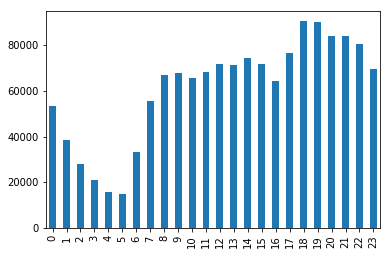

In [20]:
# Hourly trip counts in a single day
insights["hour"].value_counts().sort_index().plot(kind='bar')

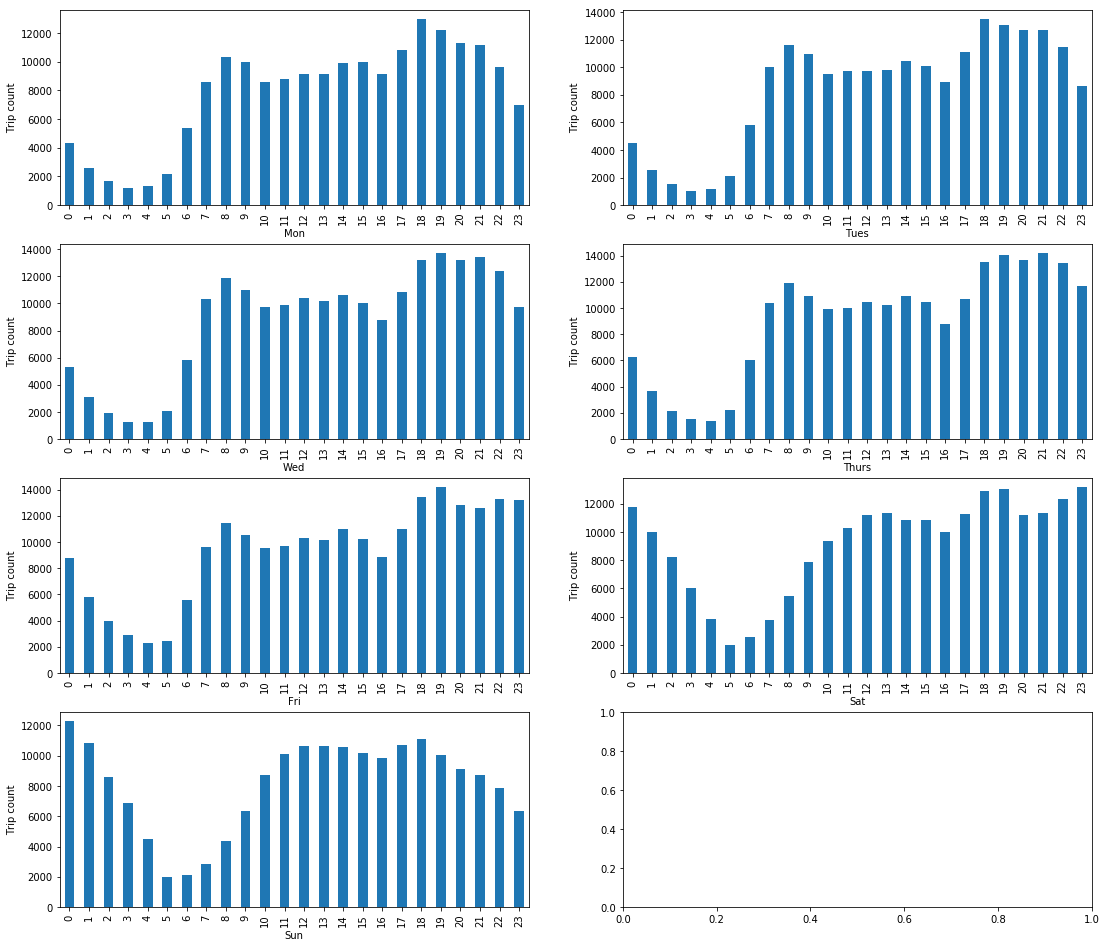

In [21]:
# Day wise trip count for each hour
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(18.5, 16.5)
for i in range(7):
    a = insights[insights['weekday']==i]["hour"].value_counts().sort_index().plot(kind='bar',ax=ax[int(i/2)][i%2])
    a.set_xlabel(days[i])
    a.set_ylabel("Trip count")

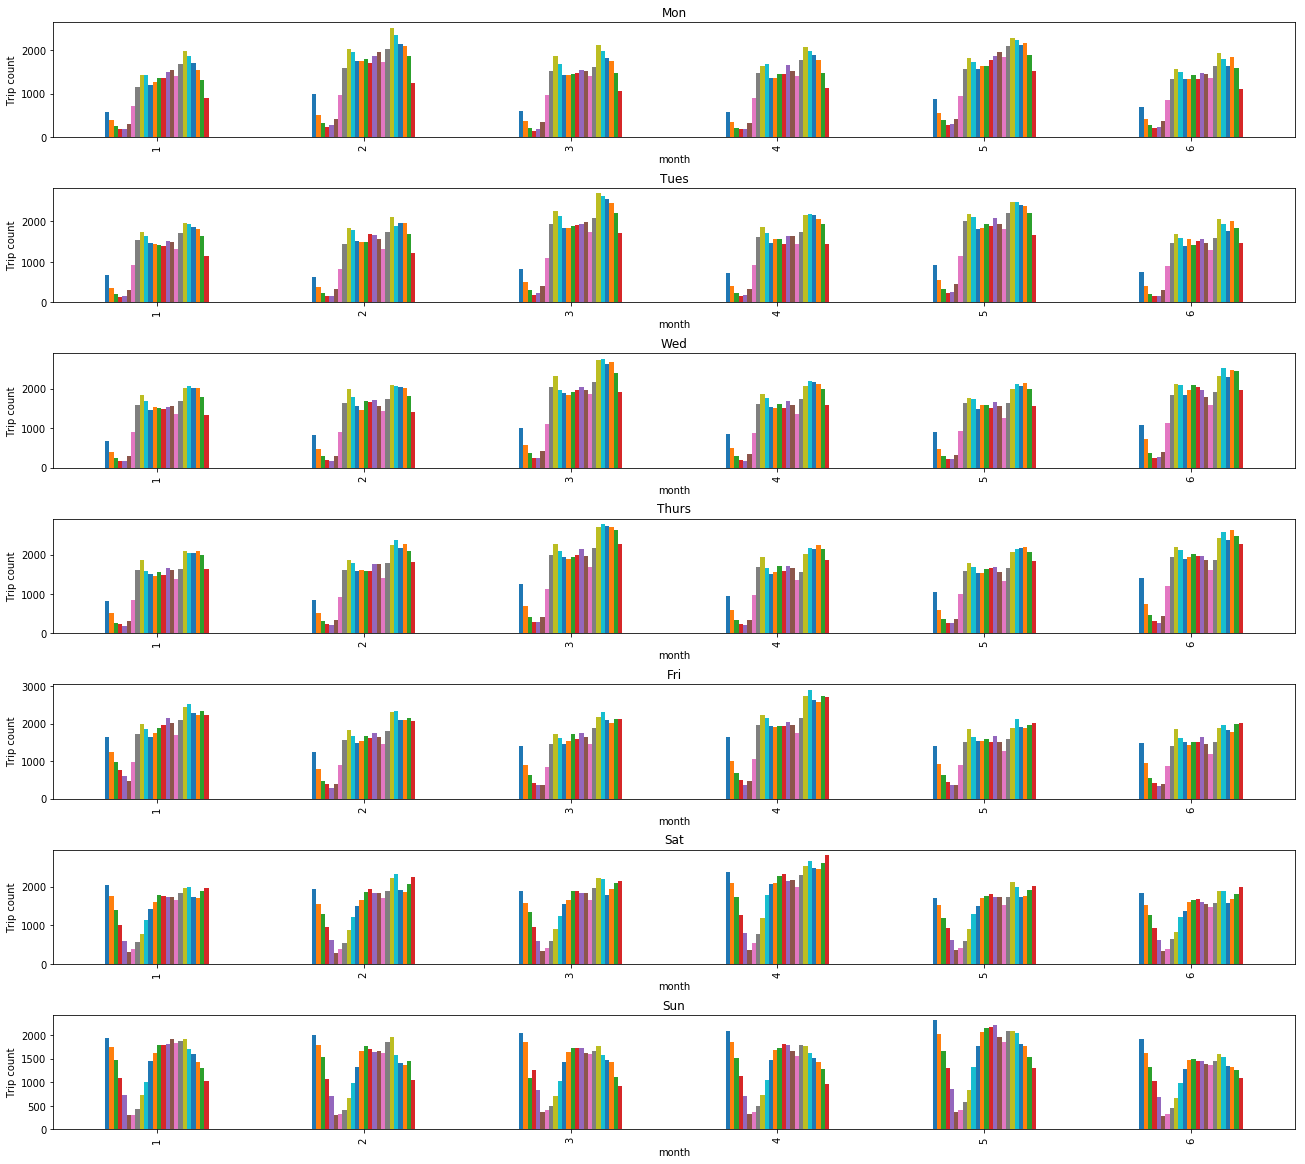

In [35]:
# Monthly Day wise trip count for each hour
fig, ax = plt.subplots(7, 1)
fig.set_size_inches(18.5, 16.5)
fig.tight_layout(pad=3.0)
for i in range(7):
    a = insights[insights['weekday']==i].groupby("month")['hour'].value_counts().unstack(level=1).fillna(0).rename_axis([None], axis=1).reset_index().plot(x="month", y=list(range(24)), kind="bar",ax=ax[i])
    a.set_title(days[i],loc='center')
    a.set_ylabel("Trip count")
    a.get_legend().remove();

### Feature passenger_count

In [36]:
insights = pd.DataFrame()
insights["Frequency"] = dataset_raw["passenger_count"].value_counts()
insights["Normalized Frequency"] = dataset_raw["passenger_count"].value_counts(normalize=True) * 100
insights

,Frequency,Normalized Frequency
1,1033540,70.856220
2,210318,14.418734
5,78088,5.353465
3,59896,4.106280
6,48333,3.313557
4,28404,1.947288
0,60,0.004113
7,3,0.000206
9,1,0.000069
8,1,0.000069


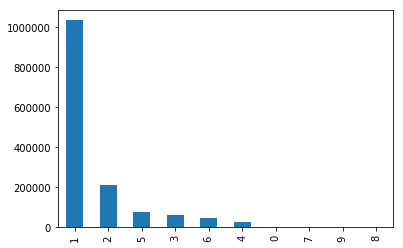

In [42]:
dataset_raw["passenger_count"].value_counts().plot(kind='bar')

### Feature osrm_distance (Derived feature)

In [2]:
dataset = pd.read_csv("feature_set_with_osrm_dis_dur.csv")

/home/dinesh/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dataset.dtypes

Unnamed: 0              int64
id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dayOfWeek               int64
hour                    int64
minute                  int64
osrm_distance          object
osrm_duration          object
dtype: object

In [20]:
 dataset = dataset.drop(dataset[dataset.osrm_distance=="No_route"].index)

In [7]:
dataset = dataset.astype({'osrm_distance': 'float64'})

In [13]:
# Convert distance to Km
dataset['osrm_distance']= dataset['osrm_distance']/1000

In [44]:
 df = dataset.drop(dataset[dataset.osrm_distance >40].index)

In [47]:
print("Trip count above 40km : ",dataset.shape[0] - df.shape[0])

Trip count above 40km :  895


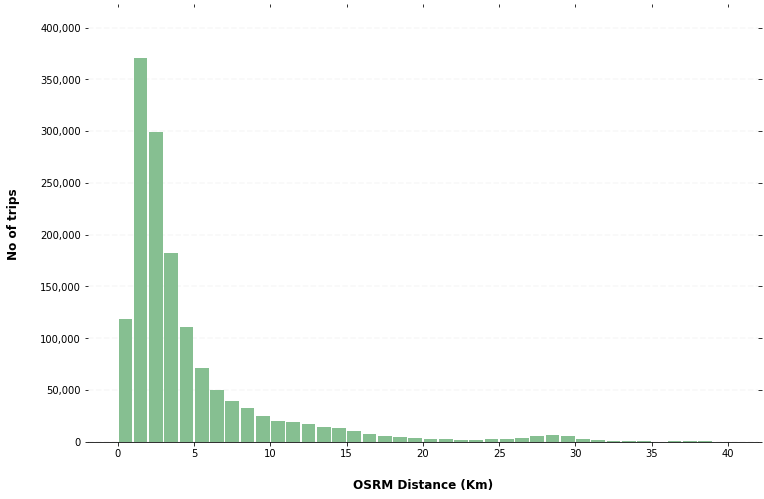

In [48]:
ax = df.hist(column='osrm_distance', bins=40, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("OSRM Distance (Km)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("No of trips", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))